- PENDIENTES:
    - Chequear antecedentes
    - Chequear cantidad de fr (que den las sumas)
    - Calcular TAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# 1- CARGANDO LA BASE

In [2]:
df = pd.read_excel("BASE.xlsx")

In [3]:
df.head(1)

,-,NOMBRE,EDAD,HC,GENERO,DIAGNOSTICO,CODIGO_DIAGNOSTICO,ANTECEDENTES,NUMERO_ANTECEDENTES,ANTECEDENTE RESPIRATORIO NO: 0 / SI: 1,...,EDAD MATERNA,NIVEL EDUCATIVO MADRE,NIVEL EDUCATIVO PADRE (SI NO HAY PADRE COLOCAR 99999),OCUPACION MADRE,OCUPACION PADRE (SI NO HAY PADRE COLOCAR 99999),MADRE O PADRE TBQ 0: NO / 1: SI,AMBIENTE EPIDEMIOLÓGICO 0: NO / 1: SI,CUAL?,OBSERVACIONES,Unnamed: 51
0,0,"ABALOS, Ciro",99999,1486980,99999,99999,99999,99999,99999,99999,...,99999,99999,99999,99999,99999,99999,99999,99999,Ingreso previo a UTIP,NaN


In [4]:
df.columns[9:15]

Index(['ANTECEDENTE RESPIRATORIO      NO: 0 / SI: 1',
       'ANTECEDENTE CARDIOVASCULAR NO: 0 / SI: 1',
       'ANTECEDENTE NEUROLOGICONO: 0 / SI: 1',
       'ANTECEDENTE METABOLICO NO: 0 / SI: 1',
       'ANTECEDENTE ONCOLOGICO  NO: 0 / SI: 1',
       'ANTECEDENTE GENETICO       NO: 0 / SI: 1'],
      dtype='object')

In [5]:
df.rename(columns = {"ANTECEDENTE RESPIRATORIO      NO: 0 / SI: 1": "ANTECEDENTE_RESPIRATORIO",
                     "ANTECEDENTE CARDIOVASCULAR NO: 0 / SI: 1": "ANTECEDENTE_CARDIOVASCULAR",
                     "ANTECEDENTE NEUROLOGICONO: 0 / SI: 1": "ANTECEDENTE_NEUROLOGICONO",
                     "ANTECEDENTE METABOLICO NO: 0 / SI: 1": "ANTECEDENTE_METABOLICO",
                     "ANTECEDENTE ONCOLOGICO  NO: 0 / SI: 1": "ANTECEDENTE_ONCOLOGICO",
                     "ANTECEDENTE GENETICO       NO: 0 / SI: 1": "ANTECEDENTE_GENETICO",
                     "OTROS            NO: 0 / SI: 1": "OTROS"},
                      inplace = True) 

df.rename(columns = {"FACTORES DE RIESGO          (ANOTAR CUAL)": "FACTORES_RIESGO"}, inplace = True)

df.rename(columns = {"TIPO DE EGRESO  VIVO: 0 / MUERTO: 1": "TIPO_EGRESO",
                    "LOCACIÓN DE EGRESO": "LOCACION_EGRESO"}, inplace = True)

df.rename(columns = {"RE-INTERNACIONES NO: 0 / SI: 1": "REINTERNACIONES"}, inplace = True)

df.rename(columns = {"VMi                       NO: 0 / SI: 1": "VMi"}, inplace = True)

df.rename(columns = {"FECHA DE INGRESO HOSPITALARIO dd/mm/aaaa": "FECHA_INGRESO_H",
                     "FECHA INGRESO A SALA DE PEDIATRIA dd/mm/aaaa": "FECHA_INGRESO_P",
                     "FECHA DE ALTA DE SALA DE PEDIATRÍA dd/mm/aaaa": "FECHA_ALTA_P",
                     "FECHA ALTA HOSPITALARIA dd/mm/aaaa": "FECHA_ALTA_H",
                     "DÍAS DE OXIGENOTERAPIA": "DIAS_O2",
                     "CANTIDAD FACTORES DE RIESGO": "CANTIDAD_FACTORES_RIESGO",
                     "TAL AL INGRESO HOSPITALARIO": "TAL"}, inplace = True)

In [6]:
df.dtypes

-                                                                                           int64
NOMBRE                                                                                     object
EDAD                                                                                        int64
HC                                                                                         object
GENERO                                                                                      int64
DIAGNOSTICO                                                                                object
CODIGO_DIAGNOSTICO                                                                          int64
ANTECEDENTES                                                                               object
NUMERO_ANTECEDENTES                                                                         int64
ANTECEDENTE_RESPIRATORIO                                                                    int64
ANTECEDENTE_CARDIOVA

In [7]:
df_NO_CI = df[df["-"] != 1]
df_CI = df[df["-"] == 1]

In [8]:
print("Total de pacientes:", df.shape[0])
print("Cumplen CI:", df_CI.shape[0])
print("No cumplen CI:", df_NO_CI.shape[0])
print(f"Representa el {round(df_CI.shape[0] / df.shape[0]  * 100 , 2)}% de la muestra")

Total de pacientes: 564
Cumplen CI: 317
No cumplen CI: 247
Representa el 56.21% de la muestra


# 2- DESCRIPCION NUMÉRICA

## 2.1- EDAD

In [9]:
print("Distribución de las categorías por edad:")
print("0: < 1 MES")
print("1: >= 1 MES o < 6 MESES ")
print("2: >= 6 MES o < 12 MESES")
print("3: >= 12 MESES <= 24 MESES")
print("\n")
print("Frecuencias absolutas:")
display(df_CI["EDAD"].value_counts().sort_index())
print("---------" * 2)
print("Frecuencias relativas:")
round(df_CI["EDAD"].value_counts(normalize = True) * 100, 2).sort_index()

Distribución de las categorías por edad:
0: < 1 MES
1: >= 1 MES o < 6 MESES 
2: >= 6 MES o < 12 MESES
3: >= 12 MESES <= 24 MESES


Frecuencias absolutas:


0     15
1    152
2     87
3     63
Name: EDAD, dtype: int64

------------------
Frecuencias relativas:


0     4.73
1    47.95
2    27.44
3    19.87
Name: EDAD, dtype: float64

In [10]:
df_CI["EDAD"].isna().sum()
print("No hay valores 88888 o 99999 en columna 'EDAD'.")
print("No hay nulos en columna 'EDAD'.")

No hay valores 88888 o 99999 en columna 'EDAD'.
No hay nulos en columna 'EDAD'.


## 2.2- GENERO

In [11]:
print("Distribución de las categorías por género:")
print("0: Femenino")
print("1: Masculino")
print("\n")
print("Frecuencias absolutas:")
display(df_CI["GENERO"].value_counts().sort_index())
print("---------" * 2)
print("Frecuencias relativas:")
round(df_CI["GENERO"].value_counts(normalize = True) * 100, 2).sort_index()

Distribución de las categorías por género:
0: Femenino
1: Masculino


Frecuencias absolutas:


0    141
1    176
Name: GENERO, dtype: int64

------------------
Frecuencias relativas:


0    44.48
1    55.52
Name: GENERO, dtype: float64

In [12]:
df_CI["GENERO"].isna().sum()
print("No hay valores 88888 o 99999 en columna 'GENERO'.")
print("No hay nulos en columna 'GENERO'.")

No hay valores 88888 o 99999 en columna 'GENERO'.
No hay nulos en columna 'GENERO'.


## 2.3- DIAGNOSTICO

In [13]:
print("Distribución de las categorías por diagnóstico:")
print("0: IRAB")
print("1: BQL")
print("2: NMN")
print("3: NMN + DERRAME")
print("6: BQL + NMN")

print("\n")
print("Frecuencias absolutas:")
display(df_CI["DIAGNOSTICO"].value_counts())
print("---------" * 2)
print("Frecuencias relativas:")
round(df_CI["DIAGNOSTICO"].value_counts(normalize = True) * 100, 2)

Distribución de las categorías por diagnóstico:
0: IRAB
1: BQL
2: NMN
3: NMN + DERRAME
6: BQL + NMN


Frecuencias absolutas:


BQL              180
NMN               59
IRAB              58
BQL + NMN         15
NMN + DERRAME      5
Name: DIAGNOSTICO, dtype: int64

------------------
Frecuencias relativas:


BQL              56.78
NMN              18.61
IRAB             18.30
BQL + NMN         4.73
NMN + DERRAME     1.58
Name: DIAGNOSTICO, dtype: float64

In [14]:
df_CI["DIAGNOSTICO"].isna().sum()
print("No hay valores 88888 o 99999 en columna 'DIAGNOSTICO'.")
print("No hay nulos en columna 'DIAGNOSTICO'.")

No hay valores 88888 o 99999 en columna 'DIAGNOSTICO'.
No hay nulos en columna 'DIAGNOSTICO'.


## 2.4- ANTECEDENTES

In [15]:
print("Se muestra el top 5 de antecedentes:")
print("\tEjemplo: 'NO' aparece en 161 pacientes.")
display(df_CI["ANTECEDENTES"].value_counts().head())
print("\n")
top_antecedente = df_CI["ANTECEDENTES"].value_counts().head(1)
print(f"161 pacientes no tuvieron antecedentes. Esto representa el {round(160 / df_CI.shape[0] * 100, 2)}%.")
n_sbo = df_CI[df_CI["ANTECEDENTES"].str.contains("SBO")].shape[0]
print(f"{n_sbo} pacientes con antecedente de 'SBO' (en todas sus variantes). Esto representa el {round(n_sbo / df_CI.shape[0] * 100, 2)}%.")

Se muestra el top 5 de antecedentes:
	Ejemplo: 'NO' aparece en 161 pacientes.


NO                      161
SBO AMBULATORIO          78
UTIN                      7
UTIN-SBO AMBULATORIO      3
HIRSCHPRUNG - UTIN        1
Name: ANTECEDENTES, dtype: int64



161 pacientes no tuvieron antecedentes. Esto representa el 50.47%.
99 pacientes con antecedente de 'SBO' (en todas sus variantes). Esto representa el 31.23%.


In [16]:
print("Distribución de las categorías por antecedente:")
print("\n")
print("Nro de antecedentes (n):")
display(df_CI["NUMERO_ANTECEDENTES"].value_counts().sort_index())
print("\n")
print("Nro de antecedentes (%):")
display(round(df_CI["NUMERO_ANTECEDENTES"].value_counts(normalize = True) * 100, 2))
print("\n")
n_ant_median = df_CI["NUMERO_ANTECEDENTES"].median()
print(f"La mediana de nro de antecedentes fue de {n_ant_median}.")

Distribución de las categorías por antecedente:


Nro de antecedentes (n):


0    161
1    116
2     24
3     10
4      2
5      1
6      2
8      1
Name: NUMERO_ANTECEDENTES, dtype: int64



Nro de antecedentes (%):


0    50.79
1    36.59
2     7.57
3     3.15
4     0.63
6     0.63
5     0.32
8     0.32
Name: NUMERO_ANTECEDENTES, dtype: float64



La mediana de nro de antecedentes fue de 0.0.


In [17]:
n_ant_median = df_CI["NUMERO_ANTECEDENTES"].median()
print(f"La mediana de nro de antecedentes fue de {n_ant_median}.")

La mediana de nro de antecedentes fue de 0.0.


In [18]:
# Celda que corrobora que los pacientes que tienen "NUMERO_ANTECEDENTES" = 0 tienen "ANTECEDENTES" = 0
df_CI[(df_CI["NUMERO_ANTECEDENTES"] == 0) & (df_CI["ANTECEDENTES"] != "NO")][["NOMBRE", "ANTECEDENTES", "NUMERO_ANTECEDENTES"]]

,NOMBRE,ANTECEDENTES,NUMERO_ANTECEDENTES


In [19]:
antecedentes_col = ['ANTECEDENTE_RESPIRATORIO', 'ANTECEDENTE_CARDIOVASCULAR',
                    'ANTECEDENTE_NEUROLOGICONO', 'ANTECEDENTE_METABOLICO',
                    'ANTECEDENTE_ONCOLOGICO', 'ANTECEDENTE_GENETICO', 'OTROS']

print("Antecedente más predominante: \n")

for i in antecedentes_col:
    print(f"{i}:")
    print(df_CI[i].sum())
    print("---" * 8)

Antecedente más predominante: 

ANTECEDENTE_RESPIRATORIO:
114
------------------------
ANTECEDENTE_CARDIOVASCULAR:
14
------------------------
ANTECEDENTE_NEUROLOGICONO:
7
------------------------
ANTECEDENTE_METABOLICO:
12
------------------------
ANTECEDENTE_ONCOLOGICO:
0
------------------------
ANTECEDENTE_GENETICO:
17
------------------------
OTROS:
40
------------------------


## 2.5- FACTORES DE RIESGO

In [20]:
top_antecedente = df_CI["FACTORES_RIESGO"].value_counts().head(1)

print(f"188 pacientes no tuvieron factores de riesgo. Esto representa el {round(188 / df_CI.shape[0] * 100, 2)}%.")

188 pacientes no tuvieron factores de riesgo. Esto representa el 59.31%.


In [21]:
n_3meses = df_CI[df_CI["FACTORES_RIESGO"].str.contains("MESES", na = False)].shape[0]
print(f"88 pacientes con factores de riesgo '< 3 MESES'. Esto representa el {round(n_3meses / df_CI.shape[0] * 100, 2)}%.")

88 pacientes con factores de riesgo '< 3 MESES'. Esto representa el 27.76%.


In [22]:
print("Se muestra el top 5 de factores de riesgo")
print("\n")
print("Nro de factores de riesgo (n):")
display(df_CI["FACTORES_RIESGO"].value_counts().head())
print("\n")
print("Nro de factores de riesgo (%):")
round(df_CI["FACTORES_RIESGO"].value_counts(normalize = True).head() * 100, 2)

Se muestra el top 5 de factores de riesgo


Nro de factores de riesgo (n):


NO                         188
< 3 MESES                   77
RNPT                        18
BPEG                         9
< 3 MESES - RNPT - BPEG      4
Name: FACTORES_RIESGO, dtype: int64



Nro de factores de riesgo (%):


NO                         59.31
< 3 MESES                  24.29
RNPT                        5.68
BPEG                        2.84
< 3 MESES - RNPT - BPEG     1.26
Name: FACTORES_RIESGO, dtype: float64

## 2.6- MORTALIDAD

In [23]:
df_CI["TIPO_EGRESO"].value_counts()
print("La mortalidad fue del 0%")

La mortalidad fue del 0%


## 2.7- LOCACION DE EGRESO

In [24]:
print("Distribución de las categorías por Locación de egreso:")
print("0: DOMICILIO")
print("1: MAYOR COMPLEJIDAD")
print("2: OTRA INSTITUCION")

print("\n")
display(df_CI["LOCACION_EGRESO"].value_counts())
print("---------" * 2)
round(df_CI["LOCACION_EGRESO"].value_counts(normalize = True) * 100, 2)

Distribución de las categorías por Locación de egreso:
0: DOMICILIO
1: MAYOR COMPLEJIDAD
2: OTRA INSTITUCION




0    279
1     37
2      1
Name: LOCACION_EGRESO, dtype: int64

------------------


0    88.01
1    11.67
2     0.32
Name: LOCACION_EGRESO, dtype: float64

## 2.8- REINTERNACIONES

In [25]:
print("Distribución de las categorías por número de reinternaciones:")
print("0: No")
print("1: Si")
print("\n")
display(df_CI["REINTERNACIONES"].value_counts())
print("---------" * 2)
round(df_CI["REINTERNACIONES"].value_counts(normalize = True) * 100, 2)

Distribución de las categorías por número de reinternaciones:
0: No
1: Si




0    264
1     53
Name: REINTERNACIONES, dtype: int64

------------------


0    83.28
1    16.72
Name: REINTERNACIONES, dtype: float64

## 2.9- DIAS O2

In [26]:
print(f"Mediana de días de oxigenoterapia: {df_CI['DIAS_O2'].median()}")
print(f"Media de días de oxigenoterapia: {round(df_CI['DIAS_O2'].mean(), 2)}")

Mediana de días de oxigenoterapia: 4.0
Media de días de oxigenoterapia: 5.15


## 2.10- DIAS DE INTERNACION

In [27]:
df_CI[["FECHA_INGRESO_H", "FECHA_INGRESO_P", "FECHA_ALTA_P", "FECHA_ALTA_H"]].head(1)

,FECHA_INGRESO_H,FECHA_INGRESO_P,FECHA_ALTA_P,FECHA_ALTA_H
2,21/06/2019,21/06/2019,26/06/2019,26/06/2019


In [28]:
df_CI[["FECHA_INGRESO_H", "FECHA_ALTA_H"]].dtypes

FECHA_INGRESO_H    object
FECHA_ALTA_H       object
dtype: object

In [29]:
df_CI.loc[df_CI["FECHA_INGRESO_H"] == "88888", "FECHA_INGRESO_H"] = np.nan
df_CI.loc[df_CI["FECHA_ALTA_H"] == "88888", "FECHA_ALTA_H"] = np.nan

In [30]:
df_CI["FECHA_INGRESO_H"] = pd.to_datetime(df_CI["FECHA_INGRESO_H"], infer_datetime_format = True)
df_CI["FECHA_ALTA_H"] = pd.to_datetime(df_CI["FECHA_ALTA_H"], infer_datetime_format = True)

In [31]:
df_CI[["FECHA_INGRESO_H", "FECHA_ALTA_H"]].dtypes

FECHA_INGRESO_H    datetime64[ns]
FECHA_ALTA_H       datetime64[ns]
dtype: object

In [32]:
df_CI["DIAS_ESTADIA_H"] = df_CI["FECHA_ALTA_H"] - df_CI["FECHA_INGRESO_H"]

In [33]:
df_CI[df_CI["DIAS_ESTADIA_H"] < pd.Timedelta(0)]

,-,NOMBRE,EDAD,HC,GENERO,DIAGNOSTICO,CODIGO_DIAGNOSTICO,ANTECEDENTES,NUMERO_ANTECEDENTES,ANTECEDENTE_RESPIRATORIO,...,NIVEL EDUCATIVO MADRE,NIVEL EDUCATIVO PADRE (SI NO HAY PADRE COLOCAR 99999),OCUPACION MADRE,OCUPACION PADRE (SI NO HAY PADRE COLOCAR 99999),MADRE O PADRE TBQ 0: NO / 1: SI,AMBIENTE EPIDEMIOLÓGICO 0: NO / 1: SI,CUAL?,OBSERVACIONES,Unnamed: 51,DIAS_ESTADIA_H


In [34]:
# Corroboro que no hay valores 88888 y 99999
df_CI['DIAS_ESTADIA_H'].dt.days.unique()

array([ 5.,  7.,  6.,  3., 10., 53.,  8., 11., 29., 57.,  4.,  2., 17.,
       16., 67., 20., nan, 18., 12.,  9., 15., 24., 13., 26., 14., 21.,
       27., 32.,  1., 22., 19.])

In [35]:
print(f"La mediana de días de internación fue de {int(df_CI['DIAS_ESTADIA_H'].dt.days.median())} días.")

La mediana de días de internación fue de 6 días.


# 3- GRAFICOS

In [36]:
df_CI.head(1)

,-,NOMBRE,EDAD,HC,GENERO,DIAGNOSTICO,CODIGO_DIAGNOSTICO,ANTECEDENTES,NUMERO_ANTECEDENTES,ANTECEDENTE_RESPIRATORIO,...,NIVEL EDUCATIVO MADRE,NIVEL EDUCATIVO PADRE (SI NO HAY PADRE COLOCAR 99999),OCUPACION MADRE,OCUPACION PADRE (SI NO HAY PADRE COLOCAR 99999),MADRE O PADRE TBQ 0: NO / 1: SI,AMBIENTE EPIDEMIOLÓGICO 0: NO / 1: SI,CUAL?,OBSERVACIONES,Unnamed: 51,DIAS_ESTADIA_H
2,1,"ACEVEDO, Noah",1,1484441,1,BQL,1,NO,0,0,...,1,3,AMA DE CASA,EMPLEADO,0,1,88888,-,NaN,5 days


## 3.1-EDAD

### A- EDAD/GENERO

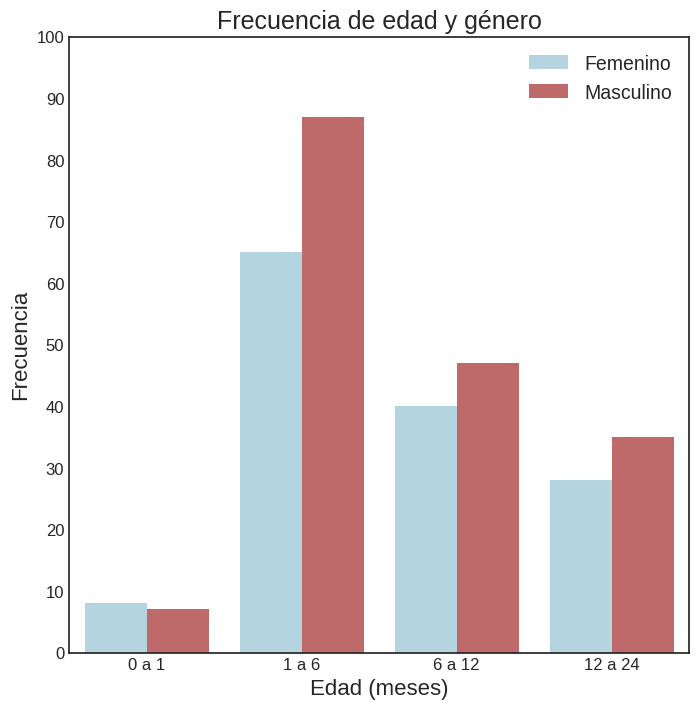

In [191]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (8, 8))
color_dict = {0: "lightblue", 1: "indianred"}


sns.countplot(x = "EDAD", 
              data = df_CI,
              hue = "GENERO",
              palette = color_dict)

legend = plt.legend(fontsize = 14)
legend.get_texts()[0].set_text('Femenino')
legend.get_texts()[1].set_text('Masculino')

plt.ylabel("Frecuencia", fontsize = 16)
plt.xlabel("Edad (meses)", fontsize = 16)
plt.yticks(range(0,110,10), fontsize = 12)
plt.xticks(ticks = [0,1,2,3], labels = ["0 a 1", "1 a 6", "6 a 12", "12 a 24"], fontsize = 12)
plt.title("Frecuencia de edad y género", fontsize = 18)

plt.show()

### B- EDAD/ANTECEDENTES

In [197]:
print("Se observan la cantidad de categorías diferentes que posee la columna 'ANTECEDENTES':")
df_CI["ANTECEDENTES"].value_counts()

Se observan la cantidad de categorías diferentes que posee la columna 'ANTECEDENTES':


NO                                               161
SBO AMBULATORIO                                   78
UTIN                                               7
UTIN-SBO AMBULATORIO                               3
HIRSCHPRUNG - UTIN                                 1
                                                ... 
SDR-DBP-DAP-HIC-Hiperbilirubinemia                 1
SBO AMBULATORIO-PIEOLONEFRITIS CON BACTEREMIA      1
MOEBIUS-TQT                                        1
SDR-ANEMIA                                         1
CARDIOPATÍA - QX DE GLEN                           1
Name: ANTECEDENTES, Length: 72, dtype: int64

In [198]:
df_CI.loc[df_CI["ANTECEDENTES"] == "NO", "TIENE_ANTECEDENTE"] = 0
df_CI.loc[df_CI["ANTECEDENTES"] != "NO", "TIENE_ANTECEDENTE"] = 1

In [200]:
print("Como la columna 'ANTECEDENTES' tiene muchas categorías diferentes, se categoriza en '0/1'")
df_CI["TIENE_ANTECEDENTE"].value_counts()

Como la columna 'ANTECEDENTES' tiene muchas categorías diferentes, se categoriza en '0/1'


0.0    161
1.0    156
Name: TIENE_ANTECEDENTE, dtype: int64

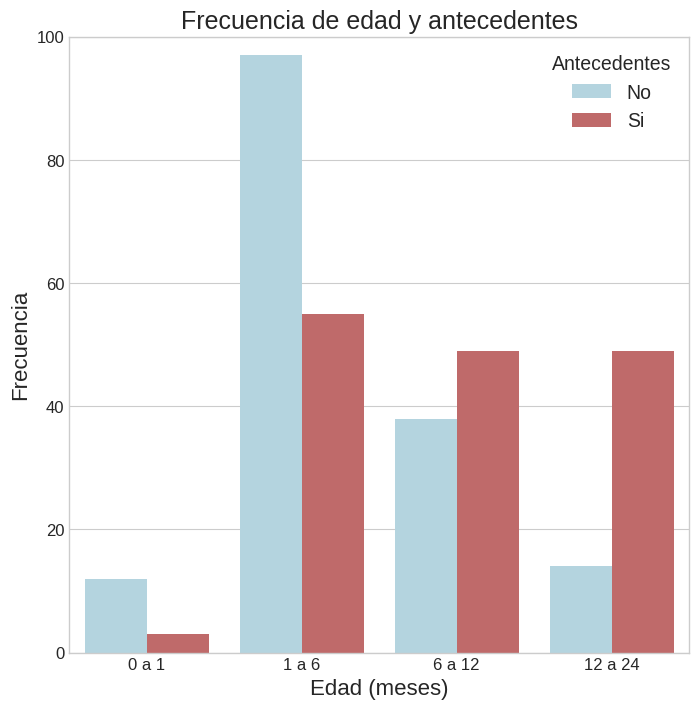

In [211]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (8, 8))
color_dict = {0: "lightblue", 1: "indianred"}

sns.countplot(x = "EDAD", 
              data = df_CI,
              hue = "TIENE_ANTECEDENTE",
              palette = color_dict)

legend = plt.legend(title = "Antecedentes", fontsize = 14)
legend.get_texts()[0].set_text("No")
legend.get_texts()[1].set_text("Si")
legend.get_title().set_fontsize(14)

plt.ylabel("Frecuencia", fontsize = 16)
plt.xlabel("Edad (meses)", fontsize = 16)
plt.yticks(fontsize = 12)
plt.ylim(0,100)
plt.xticks(ticks = [0,1,2,3], labels = ["0 a 1", "1 a 6", "6 a 12", "12 a 24"], fontsize = 12)
plt.title("Frecuencia de edad y antecedentes", fontsize = 18)

plt.show()

## 3.2- DÍAS DE OXIGENOTERAPIA 

### A- O2/ANTECEDENTES

In [305]:
print("Se observan pacientes que tienen hasta 8 antecedentes")

df_CI["NUMERO_ANTECEDENTES"].value_counts()

Se observan pacientes que tienen hasta 8 antecedentes


0    161
1    116
2     24
3     10
4      2
6      2
5      1
8      1
Name: NUMERO_ANTECEDENTES, dtype: int64

In [306]:
print("Se generan 3 categorías:")
print("\t- 0 antecedentes")
print("\t- 1 antecedente")
print("\t- 2 antecedentes")
print("\t- 3 o más antecedentes")

df_CI_ant = df_CI
df_CI_ant.loc[df_CI_ant["NUMERO_ANTECEDENTES"] >= 3, "NUMERO_ANTECEDENTES"] = 3

Se generan 3 categorías:
	- 0 antecedentes
	- 1 antecedente
	- 2 antecedentes
	- 3 o más antecedentes


In [308]:
df_CI_ant["NUMERO_ANTECEDENTES"].value_counts()

0    161
1    116
2     24
3     16
Name: NUMERO_ANTECEDENTES, dtype: int64

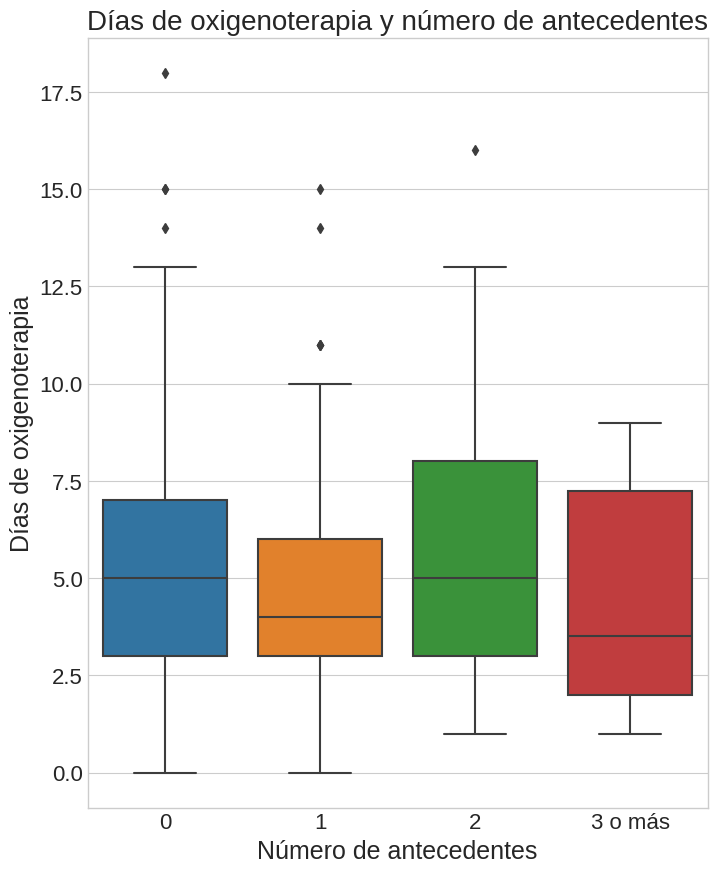

In [313]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-whitegrid")

sns.boxplot(x = "NUMERO_ANTECEDENTES", y = "DIAS_O2", data = df_CI_ant)#, hue = "Gender")

plt.title("Días de oxigenoterapia y número de antecedentes", fontsize = 20)
plt.xlabel("Número de antecedentes", fontsize = 18)
plt.xticks(ticks = [0,1,2,3], labels = ["0", "1", "2", "3 o más"],fontsize = 16)
plt.ylabel("Días de oxigenoterapia", fontsize = 18)
plt.yticks(fontsize = 16)

plt.show()

### B- O2/FR

In [37]:
df_CI_FR = df_CI

In [41]:
print("Se observan 3 pacientes con '88888'")
print("Se reemplazan por nulos.")
display(df_CI_FR["CANTIDAD_FACTORES_RIESGO"].value_counts())
df_CI_FR["CANTIDAD_FACTORES_RIESGO"] = df_CI_FR["CANTIDAD_FACTORES_RIESGO"].replace(88888, np.nan) 

Se observan 3 pacientes con '88888'
Se reemplazan por nulos.


0        188
1        107
2         14
3          5
88888      3
Name: CANTIDAD_FACTORES_RIESGO, dtype: int64

In [42]:
display(df_CI_FR["CANTIDAD_FACTORES_RIESGO"].value_counts())

0.0    188
1.0    107
2.0     14
3.0      5
Name: CANTIDAD_FACTORES_RIESGO, dtype: int64

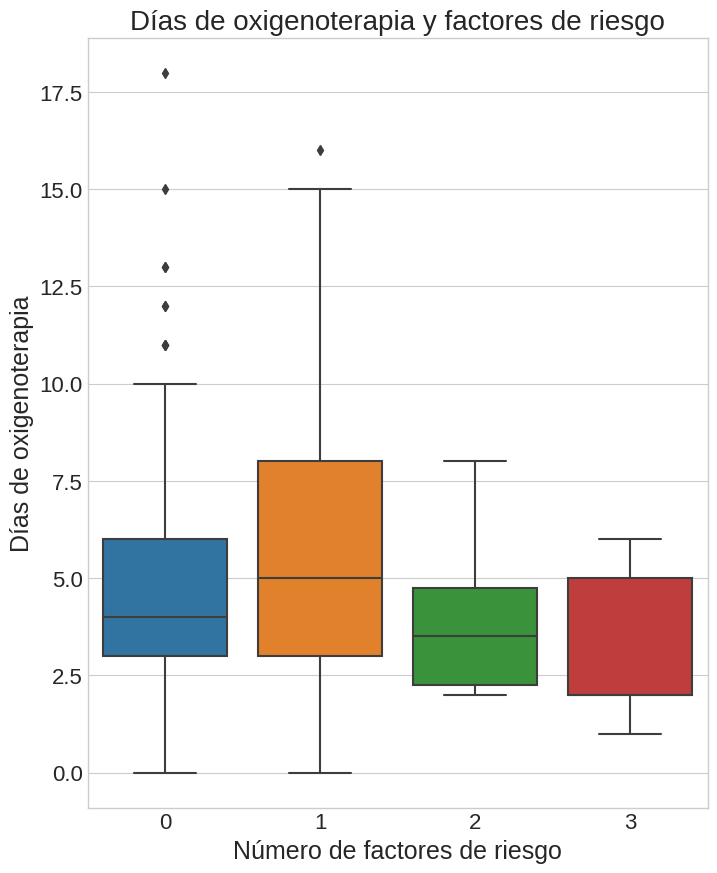

In [44]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-whitegrid")

sns.boxplot(x = "CANTIDAD_FACTORES_RIESGO", y = "DIAS_O2", data = df_CI_FR)

plt.title("Días de oxigenoterapia y factores de riesgo", fontsize = 20)
plt.xlabel("Número de factores de riesgo", fontsize = 18)
plt.xticks(ticks = [0,1,2,3], labels = ["0", "1", "2", "3"],fontsize = 16)
plt.ylabel("Días de oxigenoterapia", fontsize = 18)
plt.yticks(fontsize = 16)

plt.show()

### C- O2/TAL

In [45]:
df_CI_TAL = df_CI

In [48]:
print("Se observan 44 pacientes con '88888' y 1 con '99999'")
print("Se reemplaza por nulos")
df_CI_TAL["TAL"].value_counts()

Se observan 44 pacientes con '88888' y 1 con '99999'
Se reemplaza por nulos


8        74
7        59
9        45
88888    44
6        34
5        21
10       19
11        6
4         6
0         3
3         3
12        1
2         1
99999     1
Name: TAL, dtype: int64

In [49]:
mask_88888 = df_CI_TAL["TAL"] == 88888
mask_99999 = df_CI_TAL["TAL"] == 99999

In [50]:
df_CI_TAL = df_CI_TAL[~(mask_88888 | mask_99999)]

In [51]:
df_CI_TAL["TAL"].value_counts()

8     74
7     59
9     45
6     34
5     21
10    19
11     6
4      6
0      3
3      3
12     1
2      1
Name: TAL, dtype: int64

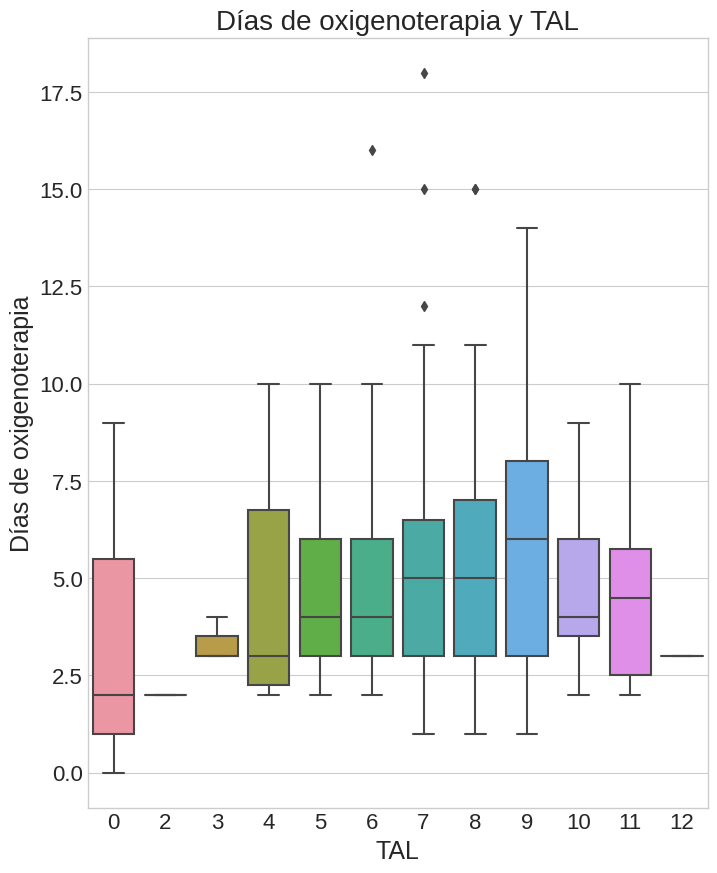

In [52]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-whitegrid")

sns.boxplot(x = "TAL", y = "DIAS_O2", data = df_CI_TAL)#, hue = "Gender")

plt.title("Días de oxigenoterapia y TAL", fontsize = 20)
plt.xlabel("TAL", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Días de oxigenoterapia", fontsize = 18)
plt.yticks(fontsize = 16)

plt.show()

### D- O2/GENERO

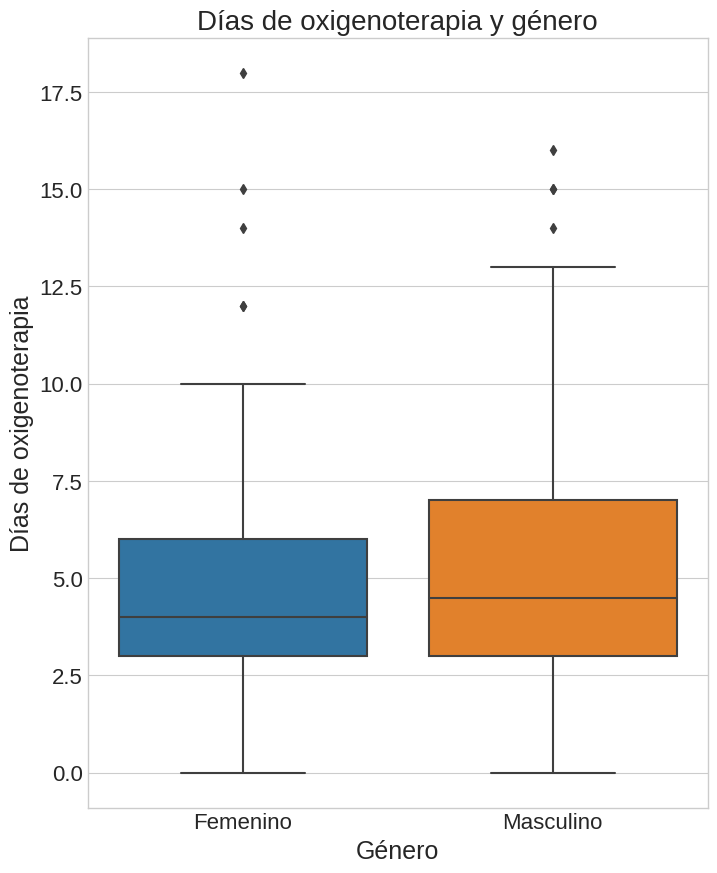

In [54]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-whitegrid")

sns.boxplot(x = "GENERO", y = "DIAS_O2", data = df_CI)

plt.title("Días de oxigenoterapia y género", fontsize = 20)
plt.xlabel("Género", fontsize = 18)
plt.xticks(ticks = [0,1], labels = ["Femenino", "Masculino"],fontsize = 16)
plt.ylabel("Días de oxigenoterapia", fontsize = 18)
plt.yticks(fontsize = 16)

plt.show()

## 3.3- DÍAS DE OXIGENOTERAPIA CON ESTADIA_H

### A- O2/ESTADIA_H/EDAD

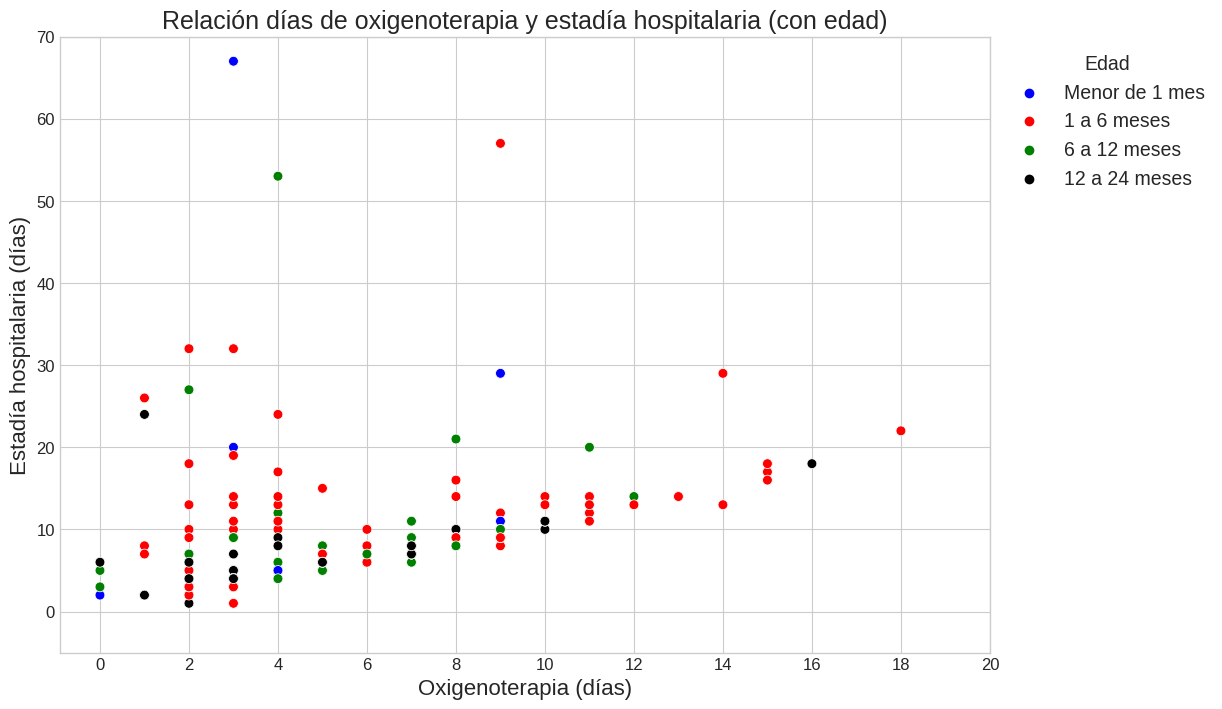

In [220]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (12, 8))
color_dict = {0: "blue", 1: "red", 2: "green", 3: "black"}

sns.scatterplot(x = "DIAS_O2",
                y = df_CI["DIAS_ESTADIA_H"].dt.days,
                data = df_CI,
                hue = "EDAD",
                s = 50,
                palette = color_dict)

legend = plt.legend(title = "Edad", fontsize = 14, bbox_to_anchor=(1.25, 1))
legend.get_texts()[0].set_text("Menor de 1 mes")
legend.get_texts()[1].set_text("1 a 6 meses")
legend.get_texts()[2].set_text("6 a 12 meses")
legend.get_texts()[3].set_text("12 a 24 meses")
legend.get_title().set_fontsize(14)


plt.ylabel("Estadía hospitalaria (días)", fontsize = 16)
plt.xlabel("Oxigenoterapia (días)", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(range(0, 22, 2), fontsize = 12)
plt.ylim(-5,70)
plt.title("Relación días de oxigenoterapia y estadía hospitalaria (con edad)", fontsize = 18)

plt.show()

### B- O2/ESTADIA_H/REINTERNACIONES

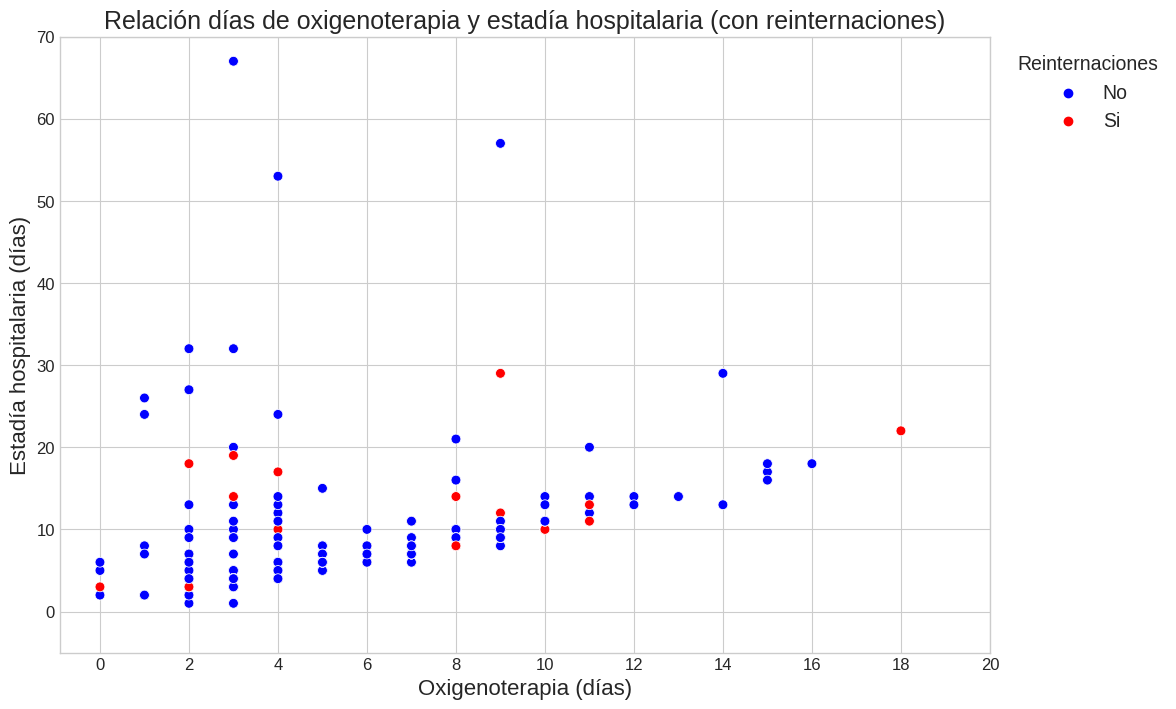

In [224]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (12, 8))
color_dict = {0: "blue", 1: "red"}

sns.scatterplot(x = "DIAS_O2",
                y = df_CI["DIAS_ESTADIA_H"].dt.days,
                data = df_CI,
                hue = "REINTERNACIONES",
                s = 50,
                palette = color_dict)

legend = plt.legend(title = "Reinternaciones", fontsize = 14, bbox_to_anchor=(1.2, 1))
legend.get_texts()[0].set_text("No")
legend.get_texts()[1].set_text("Si")
legend.get_title().set_fontsize(14)


plt.ylabel("Estadía hospitalaria (días)", fontsize = 16)
plt.xlabel("Oxigenoterapia (días)", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(range(0, 22, 2), fontsize = 12)
plt.ylim(-5,70)
plt.title("Relación días de oxigenoterapia y estadía hospitalaria (con reinternaciones)", fontsize = 18)

plt.show()

### C- O2/ESTADIA_H/DIAGNOSTICO

In [231]:
print("Se observan 5 categorías en la columna 'DIANGNOSTICO':")
print("\tSe muestra el diagnóstico y la frecuencia del mismo:")
df_CI["DIAGNOSTICO"].value_counts()
print("\n")
print("Se seleccionan solamente los diagnósticos de:")
print("\t- BQL")
print("\t- NMN")
print("\t- IRAB")

Se observan 5 categorías en la columna 'DIANGNOSTICO':
	Se muestra el diagnóstico y la frecuencia del mismo:


Se seleccionan solamente los diagnósticos de:
	- BQL
	- NMN
	- IRAB


In [232]:
mask_irab = df_CI["CODIGO_DIAGNOSTICO"] == 0
mask_bql = df_CI["CODIGO_DIAGNOSTICO"] == 1
mask_nmn = df_CI["CODIGO_DIAGNOSTICO"] == 2
df_CI_dx = df_CI[mask_irab | mask_bql| mask_nmn]

In [233]:
df_CI_dx["DIAGNOSTICO"].value_counts()

BQL     180
NMN      59
IRAB     58
Name: DIAGNOSTICO, dtype: int64

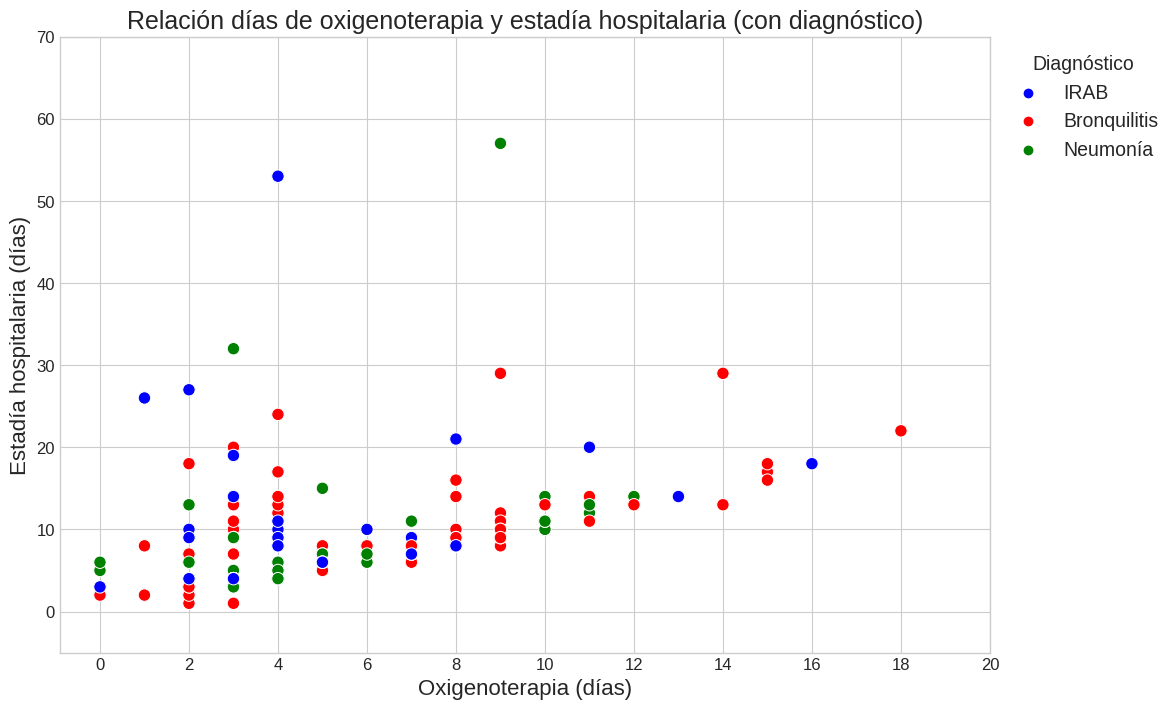

In [ ]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (12, 8))
color_dict = {0: "blue", 1: "red", 2: "green"}

sns.scatterplot(x = "DIAS_O2",
                y = df_CI_dx["DIAS_ESTADIA_H"].dt.days,
                data = df_CI_dx,
                hue = "CODIGO_DIAGNOSTICO",
                s = 80,
                palette = color_dict)

legend = plt.legend(title = "Diagnóstico", fontsize = 14, bbox_to_anchor=(1.2, 1))
legend.get_texts()[0].set_text("IRAB")
legend.get_texts()[1].set_text("Bronquilitis")
legend.get_texts()[2].set_text("Neumonía")
legend.get_title().set_fontsize(14)

plt.ylabel("Estadía hospitalaria (días)", fontsize = 16)
plt.xlabel("Oxigenoterapia (días)", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(range(0, 22, 2), fontsize = 12)
plt.ylim(-5,70)
plt.title("Relación días de oxigenoterapia y estadía hospitalaria (con diagnóstico)", fontsize = 18)

plt.show()

### D- O2/ESTADIA_H/FR

In [239]:
df_CI.CANTIDAD_FACTORES_RIESGO.unique()

array([    0,     1,     2,     3, 88888])

In [243]:
print("Se observa que dentro de 'CANTIDAD_FACTORES_RIESGO' hay 3 valores que son '88888':")
print("\tSe muestra 'Cantidad de factores de riesgo' y su frecuencia:")
df_CI.CANTIDAD_FACTORES_RIESGO.value_counts()

Se observa que dentro de 'CANTIDAD_FACTORES_RIESGO' hay 3 valores que son '88888':
	Se muestra 'Cantidad de factores de riesgo' y su frecuencia:


0        188
1        107
2         14
3          5
88888      3
Name: CANTIDAD_FACTORES_RIESGO, dtype: int64

In [246]:
print("Se transforma a 'nulo' los 88888.")
df_CI_fr = df_CI
df_CI_fr["CANTIDAD_FACTORES_RIESGO"] = df_CI_fr["CANTIDAD_FACTORES_RIESGO"].replace(88888, np.nan)

Se transforma a 'nulo' los 88888.


In [247]:
df_CI_fr.CANTIDAD_FACTORES_RIESGO.value_counts()

0.0    188
1.0    107
2.0     14
3.0      5
Name: CANTIDAD_FACTORES_RIESGO, dtype: int64

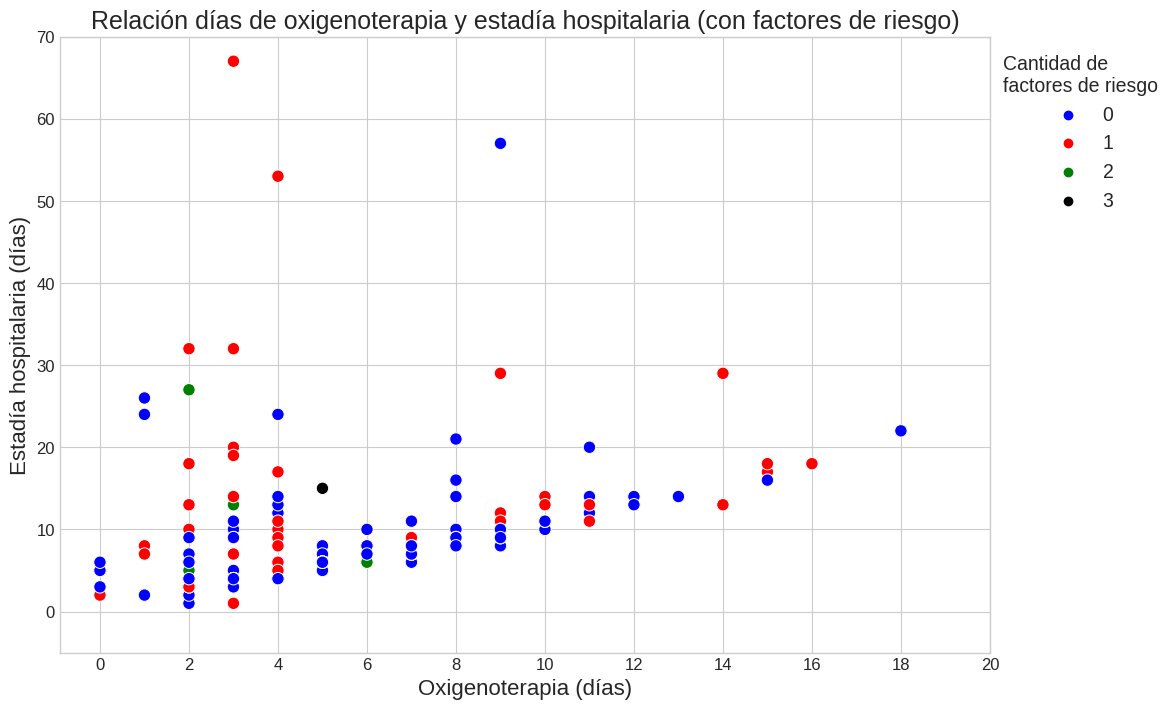

In [253]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (12, 8))
color_dict = {0: "blue", 1: "red", 2: "green", 3: "black"}

sns.scatterplot(x = "DIAS_O2",
                y = df_CI_fr["DIAS_ESTADIA_H"].dt.days,
                data = df_CI_fr,
                hue = "CANTIDAD_FACTORES_RIESGO",
                s = 80,
                palette = color_dict)


legend = plt.legend(title = "Cantidad de \nfactores de riesgo", fontsize = 14, bbox_to_anchor=(1.2, 1))
legend.get_texts()[0].set_text("0")
legend.get_texts()[1].set_text("1")
legend.get_texts()[2].set_text("2")
legend.get_texts()[3].set_text("3")
legend.get_title().set_fontsize(14)


plt.ylabel("Estadía hospitalaria (días)", fontsize = 16)
plt.xlabel("Oxigenoterapia (días)", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(range(0, 22, 2), fontsize = 12)
plt.ylim(-5,70)
plt.title("Relación días de oxigenoterapia y estadía hospitalaria (con factores de riesgo)", fontsize = 18)

plt.show()

### E- O2/ESTADIA_H/VACUNAS

In [259]:
print("Se observa que dentro de 'VACUNAS' hay 54 valores que son '88888':")
print("\tSe muestra 'VACUNAS' y su frecuencia:")
print("\t\t0: Incompletas")
print("\t\t1: Completas")
df_CI.VACUNAS.value_counts()

Se observa que dentro de 'VACUNAS' hay 54 valores que son '88888':
	Se muestra 'VACUNAS' y su frecuencia:
		0: Incompletas
		1: Completas


0        161
1        102
88888     54
Name: VACUNAS, dtype: int64

In [260]:
print("Se transforma a 'nulo' los 88888.")
df_CI_vac = df_CI
df_CI_vac["VACUNAS"] = df_CI_vac["VACUNAS"].replace(88888, np.nan)

Se transforma a 'nulo' los 88888.


In [262]:
df_CI_vac.VACUNAS.value_counts()

0.0    161
1.0    102
Name: VACUNAS, dtype: int64

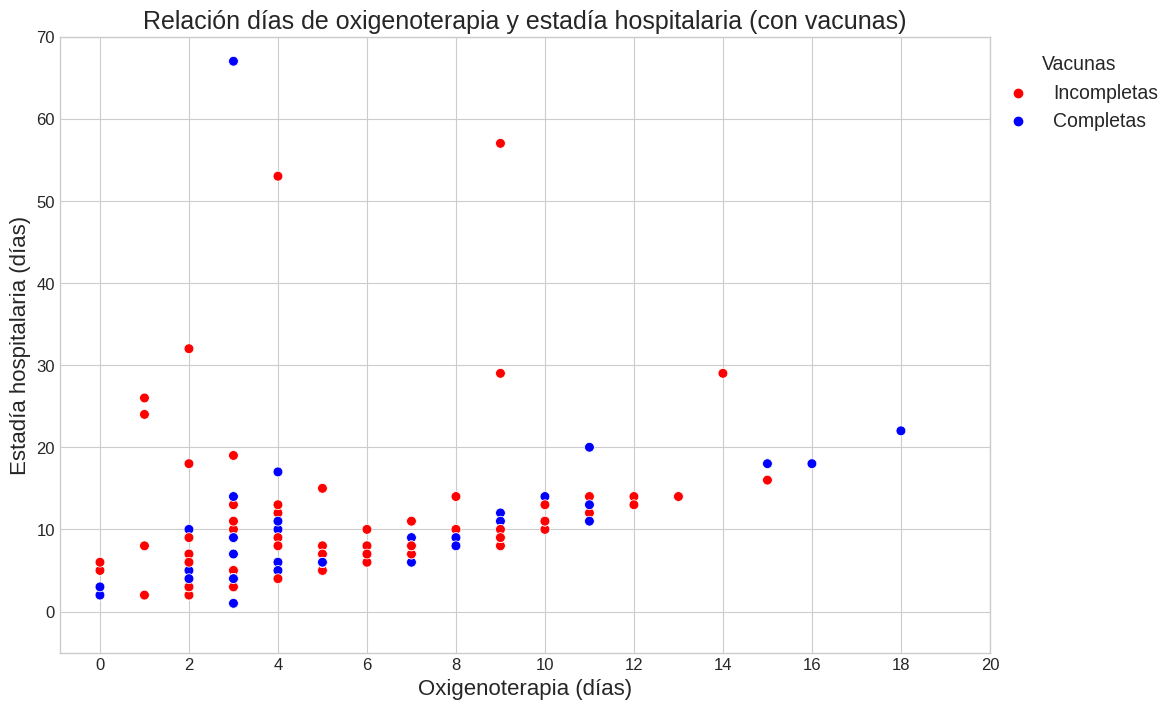

In [268]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (12, 8))
color_dict = {0: "red", 1: "blue"}

sns.scatterplot(x = "DIAS_O2",
                y = df_CI_vac["DIAS_ESTADIA_H"].dt.days,
                data = df_CI_vac,
                hue = "VACUNAS",
                s = 50,
                palette = color_dict)

legend = plt.legend(title = "Vacunas", fontsize = 14, bbox_to_anchor=(1.2, 1))
legend.get_texts()[0].set_text("Incompletas")
legend.get_texts()[1].set_text("Completas")
legend.get_title().set_fontsize(14)

plt.ylabel("Estadía hospitalaria (días)", fontsize = 16)
plt.xlabel("Oxigenoterapia (días)", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(range(0, 22, 2), fontsize = 12)
plt.ylim(-5,70)
plt.title("Relación días de oxigenoterapia y estadía hospitalaria (con vacunas)", fontsize = 18)

plt.show()

## 3.4 ESTADIA_H

### A- ESTADIA_H/EDAD

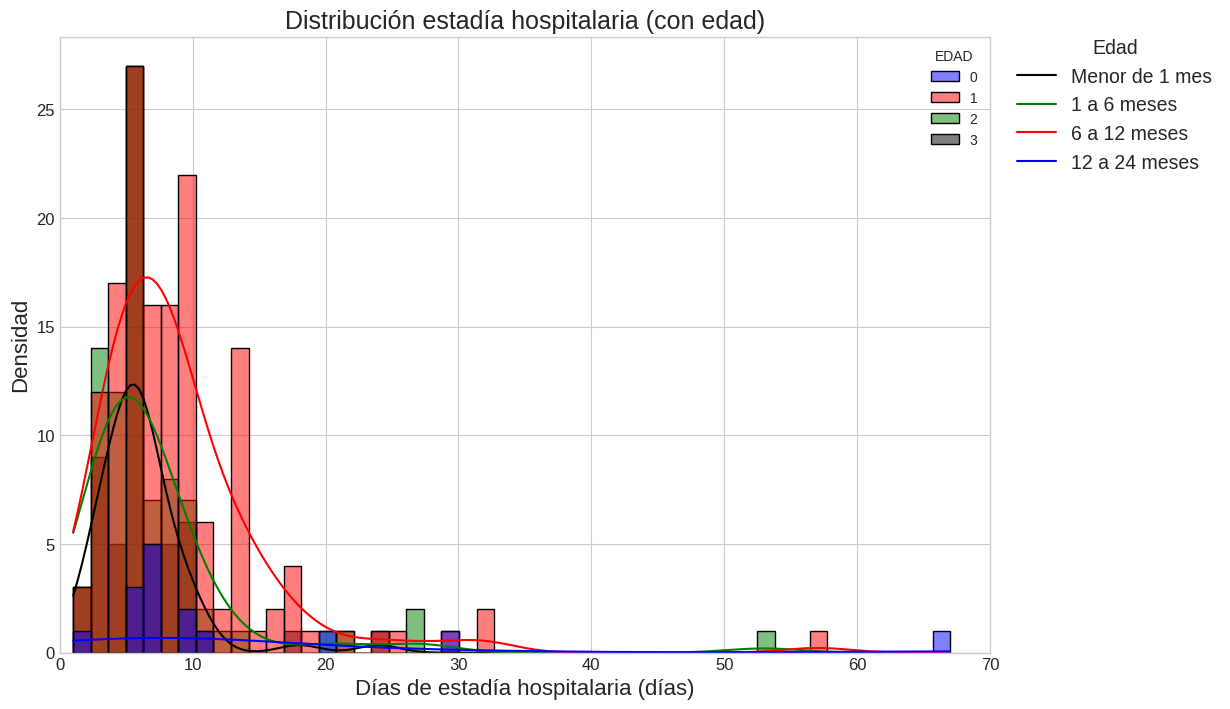

In [294]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (12, 8))
color_dict = {0: "blue", 1: "red", 2: "green", 3: "black"}

sns.histplot(x = df_CI["DIAS_ESTADIA_H"].dt.days,
            data = df_CI,
            hue = "EDAD",
            palette = color_dict,
            kde = True,
            alpha = 0.5)

labels = ["Menor de 1 mes", "1 a 6 meses", "6 a 12 meses", "12 a 24 meses"]
legend = fig.legend(title="Edad", labels=labels, fontsize=14, bbox_to_anchor=(1.1, 0.90))
legend.get_title().set_fontsize(14)

"""
legend = plt.legend(title = "Edad", fontsize = 14, bbox_to_anchor=(1.25, 1))
legend.get_texts()[0].set_text("Menor de 1 mes")
legend.get_texts()[1].set_text("1 a 6 meses")
legend.get_texts()[2].set_text("6 a 12 meses")
legend.get_texts()[3].set_text("12 a 24 meses")
legend.get_title().set_fontsize(14)
"""

plt.ylabel("Densidad", fontsize = 16)
plt.xlabel("Días de estadía hospitalaria (días)", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(0,70)
plt.title("Distribución estadía hospitalaria (con edad)", fontsize = 18)

plt.show()
plt.show()

In [303]:
print("Mediana de días de internación según categoría de edad:")
display(df_CI[df_CI["EDAD"] == 0]["DIAS_ESTADIA_H"].dt.days.median())
display(df_CI[df_CI["EDAD"] == 1]["DIAS_ESTADIA_H"].dt.days.median())
display(df_CI[df_CI["EDAD"] == 2]["DIAS_ESTADIA_H"].dt.days.median())
display(df_CI[df_CI["EDAD"] == 3]["DIAS_ESTADIA_H"].dt.days.median())

Mediana de días de internación según categoría de edad:


7.0

7.5

5.0

6.0

In [302]:
print("Media de días de internación según categoría de edad:")
display(round(df_CI[df_CI["EDAD"] == 0]["DIAS_ESTADIA_H"].dt.days.mean(), 2))
display(round(df_CI[df_CI["EDAD"] == 1]["DIAS_ESTADIA_H"].dt.days.mean(), 2))
display(round(df_CI[df_CI["EDAD"] == 2]["DIAS_ESTADIA_H"].dt.days.mean(), 2))
display(round(df_CI[df_CI["EDAD"] == 3]["DIAS_ESTADIA_H"].dt.days.mean(), 2))

Media de días de internación según categoría de edad:


13.33

8.95

7.13

6.16

## 3.5 FACTORES DE RIESGO Y LOCACION DE EGRESO

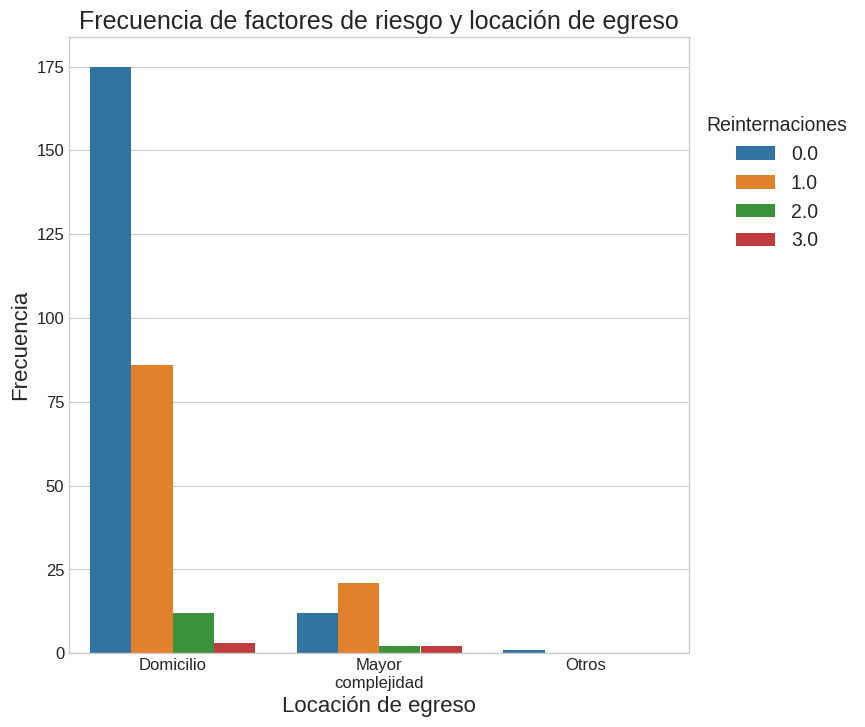

In [59]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (8, 8))

sns.countplot(x = "LOCACION_EGRESO", 
              data = df_CI,
              hue = "CANTIDAD_FACTORES_RIESGO")

plt.ylabel("Frecuencia", fontsize = 16)
plt.xlabel("Locación de egreso", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(ticks = [0,1,2], labels = ["Domicilio", "Mayor\ncomplejidad", "Otros"], fontsize = 12)
plt.title("Frecuencia de factores de riesgo y locación de egreso", fontsize = 18)

legend = plt.legend(title = "Reinternaciones", fontsize = 14, bbox_to_anchor=(1.0, 0.90))
legend.get_title().set_fontsize(14)

plt.show()